In [1]:
# Import the necessary packages.
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiedang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiedang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sophiedang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sophiedang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Read And Add A New Column 'spam' To the Dataset.**

In [3]:
# Read the dataset "spam.csv"
spam_ham_df = pd.read_csv('spam.csv')

# Create a new column 'spam' in the dataframe, where 'spam' is 1 and 'ham' is 0.
spam_ham_df['spam'] = spam_ham_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [4]:
# The dataset before cleanup/transformation.
spam_ham_df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Clean/Preprocess All The Text Within The 'Message' Column.**

In [5]:
from nltk.stem import WordNetLemmatizer
import re
# Clean the data to ensure its compatibility for the SVM algorithm.

# Function to use for text preprocessing.
def preprocess_text(text):
    # Clean/transform the text.
    set_of_stopwords = set(stopwords.words('english'))

    # Initialize a lemmatizer.
    lemmatizer = WordNetLemmatizer()

    # Remove non-alphabetical chars and change text to lowercase.
    text = re.sub('[^A-Za-z]', ' ', text.lower())

    # Tokenize the text into individual words.
    tokens = word_tokenize(text)

    # Remove stopwords from the tokens and apply lemmatization.
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in set_of_stopwords]

    # Join the preprocessed tokens back into a single string.
    preprocessed_text = ' '.join(tokens)

    # Return the preprocessed text.
    return preprocessed_text


# Apply the preprocess_text() function to the 'Message' column of the data frame.
spam_ham_df['Message'] = spam_ham_df['Message'].apply(preprocess_text)

In [6]:
# The dataset after preprocessing/cleanup.
spam_ham_df.head()

,Category,Message,spam
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry wkly comp win fa cup final tkts st ...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf life around though,0


**Fig.1: Wordcloud Showing The Most Frequently Occurring Words In Spam Messages.**

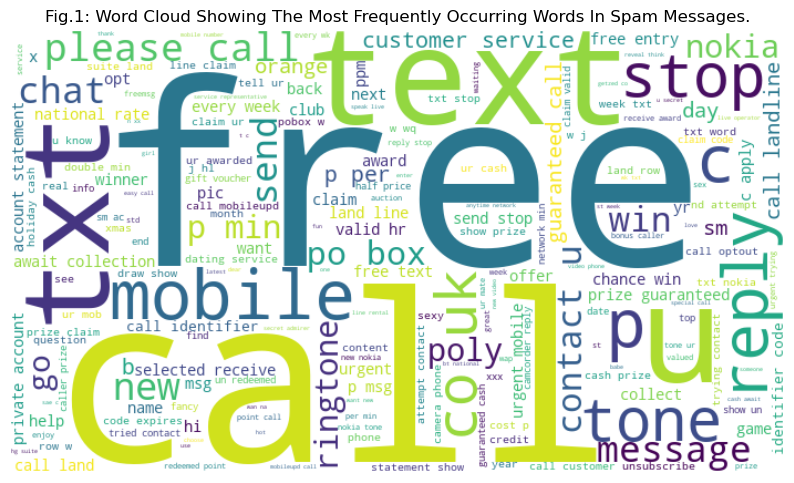

In [7]:
# Create a word cloud to display the most commonly occurring words in spam emails/messages.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Retrieve all the spam messages from the data frame.
spam_messages = spam_ham_df.loc[spam_ham_df['spam'] == 1, 'Message']

# Combine all spam messages into a single text.
spam_text = ' '.join(spam_messages)

# Create a word cloud using the spam text.
wordcloud = WordCloud(width=700, height=400, max_words=200, background_color='white').generate(spam_text)

# Create a figure to display the word cloud.
plt.figure(figsize=(10, 6))

# Display the word cloud using the 'imshow' function.
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Fig.1: Word Cloud Showing The Most Frequently Occurring Words In Spam Messages.')
plt.axis('off')
plt.show()

**Fig.2: Wordcloud Showing The Most Frequently Occurring Words In Ham Messages.**

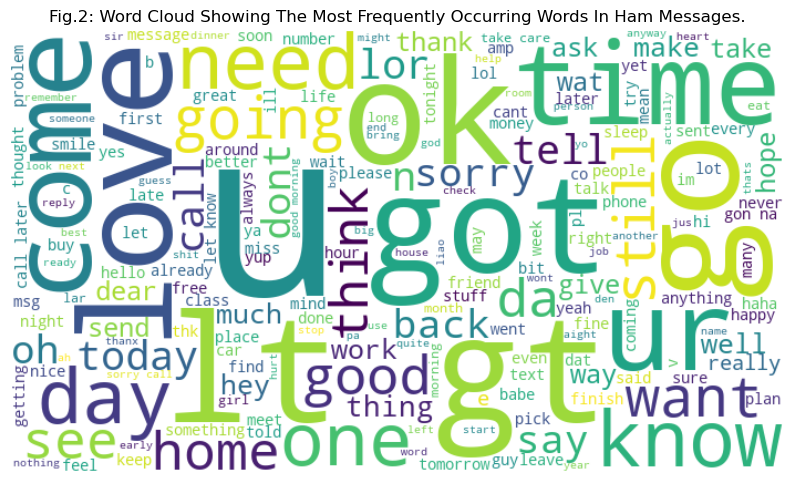

In [8]:
# Create a word cloud to display the most commonly occurring words in ham emails/messages.

# Retrieve all the ham messages from the data frame.
ham_messages = spam_ham_df.loc[spam_ham_df['spam'] == 0, 'Message']

# Combine all ham messages into a single text.
ham_text = ' '.join(ham_messages)

# Create a word cloud using the ham text.
wordcloud = WordCloud(width=700, height=400, max_words=200, background_color='white').generate(ham_text)

# Create a figure to display the word cloud.
plt.figure(figsize=(10, 6))

# Display the word cloud using the 'imshow' function.
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Fig.2: Word Cloud Showing The Most Frequently Occurring Words In Ham Messages.')
plt.axis('off')
plt.show()

***Separate The Features And Target Variable Of The Dataset.***

In [9]:
# Separate the features and target variable.
# X contains all the text in the 'Message' column.
# y contains the 1 and 0 values in the 'spam' column.
X = spam_ham_df['Message']
y = spam_ham_df['spam']

***Convert The Text Data Into Numerical Features, Split The Data Into Training/Testing Sets, and Apply SMOTE To Oversample The Minory (Spam) Class.***

In [11]:
# Change the text data into numerical features using TF-IDF vectorization.
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data frame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training set to oversample the minority (spam) class to address class imbalance. 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

***Fig.3: Bar Plot Displays Class Distribution Of Spam And Ham Messages Before And After Applying SMOTE.***

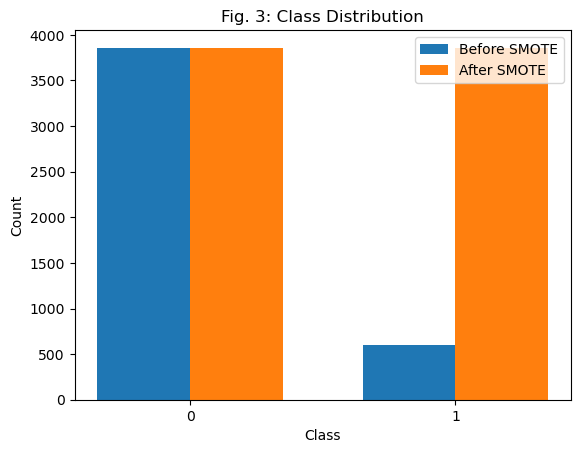

In [12]:
import matplotlib.pyplot as plt
# Bar plot displays the class distribution before/after applying SMOTE for resampling the training data.

# Calculate the class distribution before applying SMOTE.
unique_original, counts_original = np.unique(y_train, return_counts=True)
class_distr_original = dict(zip(unique_original, counts_original))

# Calculate the class distribution after applying SMOTE.
unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
class_distr_resampled = dict(zip(unique_resampled, counts_resampled))

# Set the x-axis positions for the bars.
x_pos = np.arange(len(class_distr_original))

# Set the width of the bars.
bar_width = 0.35

# Create a figure and axis object for the bar plot.
fig, ax = plt.subplots()
# Plot the bars for the class distribution before applying SMOTE.
ax.bar(x_pos, class_distr_original.values(), width=bar_width, label='Before SMOTE')
# Plot the bars for the class distribution after applying SMOTE, shifted by bar width.
ax.bar(x_pos + bar_width, class_distr_resampled.values(), width=bar_width, label='After SMOTE')
# Set labels and title for the plot.

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Fig. 3: Class Distribution')

# Set the x-axis tick positions and labels.
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(class_distr_original.keys())

# Add a legend to the plot.
ax.legend()

plt.show()

***Train The SVM Spam Filter Model.***

In [13]:
# Train the SVM classifier.
svm_classifier = SVC()
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set.
y_pred = svm_classifier.predict(X_test)

***Evaluate The Model's Performance Using Confusion Matrix And Classification Report.***

In [14]:
# Evaluate the performance of the model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# The spam filter performance metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print('\n')
# Compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix.
print("Confusion Matrix:")
print(cm)

# Generate the classification report.
report = classification_report(y_test, y_pred)
print('\n')
# Display the classification report.
print("Classification Report:")
print(report)

Accuracy: 0.979372197309417
Precision: 1.0
Recall: 0.8456375838926175
F1 Score: 0.9163636363636364


Confusion Matrix:
[[966   0]
 [ 23 126]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



***Fig.4: Heatmap visualization of the confusion matrix, where each cell represents the counts of true positives, true negatives, false positives, and false negatives.***

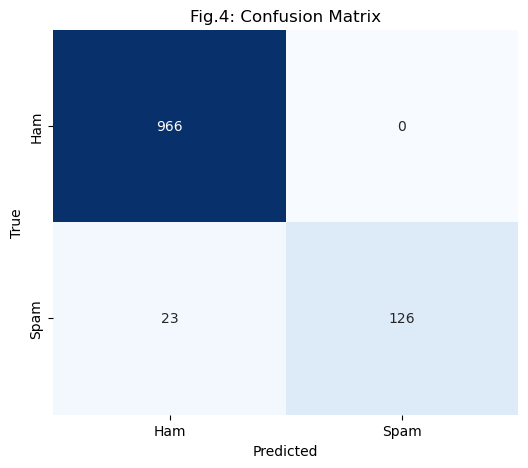

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix.
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar = False)

# Heatmap labels.
plt.title('Fig.4: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks([0.5, 1.5], ["Ham", "Spam"]) # Set x-axis tick positions and labels.
plt.yticks([0.5, 1.5], ["Ham", "Spam"]) # Set y-axis tick positions and labels.
plt.show()

***Fig.5: Bar Plot Visualizing The Precision, Recall, And F1-score For Spam And Ham Classes.***

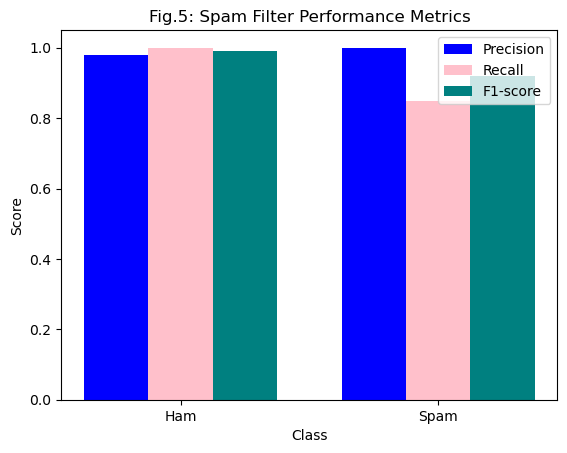

In [16]:
# Labels for the metrics and the classes.
metrics = ['Precision', 'Recall', 'F1-score']
labels = ['Ham', 'Spam']

# Define the model's performance metrics.
precision = [0.98, 1.00]
recall = [1.00, 0.85]
f1_score = [0.99, 0.92]

# Set the width of the bars.
bar_width = 0.25

# Set the positions of the bars on the x-axis.
p1 = np.arange(len(precision))
p2 = [x + bar_width for x in p1]
p3 = [x + bar_width for x in p2]

# Create the bar plot.
plt.bar(p1, precision, color='blue', width=bar_width, label='Precision')
plt.bar(p2, recall, color='pink', width=bar_width, label='Recall')
plt.bar(p3, f1_score, color='teal', width=bar_width, label='F1-score')

# Add labels, title, and legend.
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Fig.5: Spam Filter Performance Metrics')
plt.xticks([r + bar_width for r in range(len(precision))], labels)
plt.legend()

# Display the plot
plt.show()


***Command-Line Interface Allowing Users To Enter A Message/Email And Have The Spam Filter Classifies It As Spam Or Ham.***

In [17]:
# Function to preprocess and classify users' messages.
def classify_message(text):
    # Preprocess/clean the message (apply the same preprocessing steps as done during training).
    processed_message = preprocess_text(text)

    # Change the processed message into numerical features using TF-IDF vectorization.
    features = vectorizer.transform([processed_message])

    # Make predictions using the trained model.
    prediction = svm_classifier.predict(features)

    # Return the predicted class (0 for ham, 1 for spam).
    return "Spam" if prediction[0] == 1 else "Ham"

# Function to accept user inputs.
def check_user_input():
  # Continue to get user input and classify the message until the user chooses to exit.
  while True:
      # Prompt the user to enter a message.
      user_input = input("Enter a message (or 'exit' to quit): ")

      # Check if the user wants to exit.
      if user_input.lower() == 'exit':
          break

      # Classify the message.
      classification = classify_message(user_input)

      # Display the classification result.
      print("Classification: ", classification)

In [18]:
# Call function to check user input.
check_user_input()

Enter a message (or 'exit' to quit): exit


**Works Cited**:


GeeksforGeeks.(2021).Bar Plot in Matplotlib.GeeksforGeeks.
  https://www.geeksforgeeks.org/bar-plot-in-matplotlib/


GeeksforGeeks.(2023).Support Vector Machine SVM Algorithm.GeeksforGeeks.
  https://www.geeksforgeeks.org/support-vector-machine-algorithm/


Indeed Editorial Team.(2022).What Is a Confusion Matrix? (Plus How To Calculate One).
Indeed.com.
  https://wwww.indeed.com/career-advice/career-development/confusion-matrix


SMS Spam Collection Dataset. (2016, December 2) Kaggle.
  https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


Shah, R. (2022). How to Build Word Cloud in Python? Analytics Vidhya.
  https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/